In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import f_oneway







In [3]:
pip install "C:\Users\2542088\OneDrive - TCS COM PROD\Documents\Git - personal\Cloud_AWS_Labs\aw0000_dojo_lambda_devops\Librerias\pycaret-master\pycaret"

Note: you may need to restart the kernel to use updated packages.


ERROR: Directory 'C:\\Users\\2542088\\OneDrive - TCS COM PROD\\Documents\\Git - personal\\Cloud_AWS_Labs\\aw0000_dojo_lambda_devops\\Librerias\\pycaret-master\\pycaret' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


### Paso 1

In [49]:
# Paso 1 - Creadondo data set de prueba
df = pd.read_csv("fact_application.csv")
df

,application_id,organization_id,provider_id,snapshot_date_id,applicationcode,FullResourcesCount,DevResourcesCount,QaResourcesCount,PdnResourcesCount,FullAccountsCount,...,YellowFaultToleranceResourcesCount,RedPerformanceChecksCount,RedPerformanceResourcesCount,YellowPerformanceChecksCount,YellowPerformanceResourcesCount,RedCostOptimizingChecksCount,RedCostOptimizingResourcesCount,YellowCostOptimizingChecksCount,YellowCostOptimizingResourcesCount,ppn_tm
0,609,1,1,20231012,app00609,701,352,167,182,4,...,5,0,0,1,1,0,0,0,0,2023-10-12 11:48:46.008
1,613,1,1,20231012,app00613,139,90,49,0,3,...,0,0,0,0,0,0,0,0,0,2023-10-12 11:48:46.008
2,610,1,1,20231012,app00610,193,60,41,92,5,...,2,0,0,0,0,0,0,0,0,2023-10-12 11:48:46.008
3,614,1,1,20231012,app00614,79,29,23,27,3,...,1,0,0,1,1,0,0,0,0,2023-10-12 11:48:46.008
4,612,1,1,20231012,app00612,357,176,107,74,4,...,9,0,0,0,0,0,0,0,0,2023-10-12 11:48:46.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,655,1,1,20231012,app00655,57,28,15,14,3,...,0,0,0,0,0,0,0,0,0,2023-10-12 11:48:46.008
908,661,1,1,20231012,app00661,73,25,24,24,3,...,5,0,0,0,0,0,0,0,0,2023-10-12 11:48:46.008
909,658,1,1,20231012,app00658,252,126,95,31,4,...,2,0,0,1,1,0,0,0,0,2023-10-12 11:48:46.008
910,656,1,1,20231012,app00656,41,41,0,0,5,...,0,0,0,0,0,0,0,0,0,2023-10-12 11:48:46.008


In [50]:
df.describe()

,application_id,organization_id,provider_id,snapshot_date_id,FullResourcesCount,DevResourcesCount,QaResourcesCount,PdnResourcesCount,FullAccountsCount,DevAccountsCount,...,YellowFaultToleranceChecksCount,YellowFaultToleranceResourcesCount,RedPerformanceChecksCount,RedPerformanceResourcesCount,YellowPerformanceChecksCount,YellowPerformanceResourcesCount,RedCostOptimizingChecksCount,RedCostOptimizingResourcesCount,YellowCostOptimizingChecksCount,YellowCostOptimizingResourcesCount
count,912.000000,912.0,912.0,912.0,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,...,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,456.876096,1.0,1.0,20231012.0,263.184211,96.344298,70.880482,95.959430,6.389254,2.373904,...,0.726974,2.460526,0.002193,0.002193,0.221491,0.379386,0.002193,0.002193,0.019737,0.122807
std,263.906727,0.0,0.0,0.0,1254.604117,473.100976,355.346095,433.181744,22.494561,8.709326,...,0.888403,9.617183,0.046804,0.046804,0.483832,1.719882,0.046804,0.046804,0.139171,1.344275
min,1.000000,1.0,1.0,20231012.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,228.750000,1.0,1.0,20231012.0,9.000000,4.000000,0.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,456.500000,1.0,1.0,20231012.0,74.000000,27.500000,15.000000,22.500000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,685.250000,1.0,1.0,20231012.0,221.000000,77.000000,55.000000,84.000000,4.000000,1.000000,...,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,914.000000,1.0,1.0,20231012.0,27149.000000,10403.000000,7377.000000,9369.000000,177.000000,70.000000,...,4.000000,227.000000,1.000000,1.000000,3.000000,41.000000,1.000000,1.000000,1.000000,25.000000


In [51]:
# Porcentaje de 0s de cada columna
(df == 0).sum()/len(df) * 100

application_id                         0.000000
organization_id                        0.000000
provider_id                            0.000000
snapshot_date_id                       0.000000
applicationcode                        0.000000
FullResourcesCount                     0.000000
DevResourcesCount                      9.868421
QaResourcesCount                      31.140351
PdnResourcesCount                     25.219298
FullAccountsCount                      0.000000
DevAccountsCount                       9.868421
QaAccountsCount                       31.140351
PdnAccountsCount                      25.219298
RedSecurityChecksCount                60.635965
RedSecurityResourcesCount             60.635965
YellowSecurityChecksCount             38.706140
YellowSecurityResourcesCount          38.706140
RedFaultToleranceChecksCount          90.241228
RedFaultToleranceResourcesCount       90.241228
YellowFaultToleranceChecksCount       50.109649
YellowFaultToleranceResourcesCount    50

In [52]:
df.dtypes

application_id                         int64
organization_id                        int64
provider_id                            int64
snapshot_date_id                       int64
applicationcode                       object
FullResourcesCount                     int64
DevResourcesCount                      int64
QaResourcesCount                       int64
PdnResourcesCount                      int64
FullAccountsCount                      int64
DevAccountsCount                       int64
QaAccountsCount                        int64
PdnAccountsCount                       int64
RedSecurityChecksCount                 int64
RedSecurityResourcesCount              int64
YellowSecurityChecksCount              int64
YellowSecurityResourcesCount           int64
RedFaultToleranceChecksCount           int64
RedFaultToleranceResourcesCount        int64
YellowFaultToleranceChecksCount        int64
YellowFaultToleranceResourcesCount     int64
RedPerformanceChecksCount              int64
RedPerform

### Paso 2 

In [53]:
# Paso 2 - Selección de características

# features = ['fullresourcescount','devresourcescount','qaresourcescount','pdnresourcescount','fullaccountscount','devaccountscount','qaaccountscount','pdnaccountscount','redsecuritycheckscount','redsecurityresourcescount']

features = ['RedSecurityChecksCount', 'RedSecurityResourcesCount',
            'YellowSecurityChecksCount', 'YellowSecurityResourcesCount',
            'RedFaultToleranceChecksCount', 'RedFaultToleranceResourcesCount',
            'YellowFaultToleranceChecksCount', 'YellowFaultToleranceResourcesCount',
            'RedPerformanceChecksCount', 'RedPerformanceResourcesCount',
            'YellowPerformanceChecksCount', 'YellowPerformanceResourcesCount',
            'RedCostOptimizingChecksCount', 'RedCostOptimizingResourcesCount',
            'YellowCostOptimizingChecksCount', 'YellowCostOptimizingResourcesCount'
           ]

### Paso 3

In [54]:
# Paso 3 - Normalización de datos
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [55]:
df

,application_id,organization_id,provider_id,snapshot_date_id,applicationcode,FullResourcesCount,DevResourcesCount,QaResourcesCount,PdnResourcesCount,FullAccountsCount,...,YellowFaultToleranceResourcesCount,RedPerformanceChecksCount,RedPerformanceResourcesCount,YellowPerformanceChecksCount,YellowPerformanceResourcesCount,RedCostOptimizingChecksCount,RedCostOptimizingResourcesCount,YellowCostOptimizingChecksCount,YellowCostOptimizingResourcesCount,ppn_tm
0,609,1,1,20231012,app00609,701,352,167,182,4,...,0.264201,-0.046881,-0.046881,1.609932,0.361045,-0.046881,-0.046881,-0.141895,-0.091406,2023-10-12 11:48:46.008
1,613,1,1,20231012,app00613,139,90,49,0,3,...,-0.255987,-0.046881,-0.046881,-0.458037,-0.220709,-0.046881,-0.046881,-0.141895,-0.091406,2023-10-12 11:48:46.008
2,610,1,1,20231012,app00610,193,60,41,92,5,...,-0.047912,-0.046881,-0.046881,-0.458037,-0.220709,-0.046881,-0.046881,-0.141895,-0.091406,2023-10-12 11:48:46.008
3,614,1,1,20231012,app00614,79,29,23,27,3,...,-0.151950,-0.046881,-0.046881,1.609932,0.361045,-0.046881,-0.046881,-0.141895,-0.091406,2023-10-12 11:48:46.008
4,612,1,1,20231012,app00612,357,176,107,74,4,...,0.680351,-0.046881,-0.046881,-0.458037,-0.220709,-0.046881,-0.046881,-0.141895,-0.091406,2023-10-12 11:48:46.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,655,1,1,20231012,app00655,57,28,15,14,3,...,-0.255987,-0.046881,-0.046881,-0.458037,-0.220709,-0.046881,-0.046881,-0.141895,-0.091406,2023-10-12 11:48:46.008
908,661,1,1,20231012,app00661,73,25,24,24,3,...,0.264201,-0.046881,-0.046881,-0.458037,-0.220709,-0.046881,-0.046881,-0.141895,-0.091406,2023-10-12 11:48:46.008
909,658,1,1,20231012,app00658,252,126,95,31,4,...,-0.047912,-0.046881,-0.046881,1.609932,0.361045,-0.046881,-0.046881,-0.141895,-0.091406,2023-10-12 11:48:46.008
910,656,1,1,20231012,app00656,41,41,0,0,5,...,-0.255987,-0.046881,-0.046881,-0.458037,-0.220709,-0.046881,-0.046881,-0.141895,-0.091406,2023-10-12 11:48:46.008


### Paso 4

In [56]:
# Paso 4 - Elección del número de clústeres (K)
# Asuminos que sabemos el número de clústeres 4
K = 5

### Paso 5

In [57]:
# Paso 5 - Aplicación del algoritmo K-Means
kmeans = KMeans(n_clusters=K, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features])

### Paso 6

In [58]:
# Paso 6 - Análisis de resultados
# En este ejemplo, visualizaremos los clústeres.
plt.scatter(df_r['Caracteristica1'], df_r['Caracteristica2'], c=df_r['Cluster'], cmap='viridis')
plt.xlabel('Caracteristica1')
plt.xlabel('Caracteristica2')
plt.title('Agrupación de aplicaciones')
plt.show()

NameError: name 'df_r' is not defined

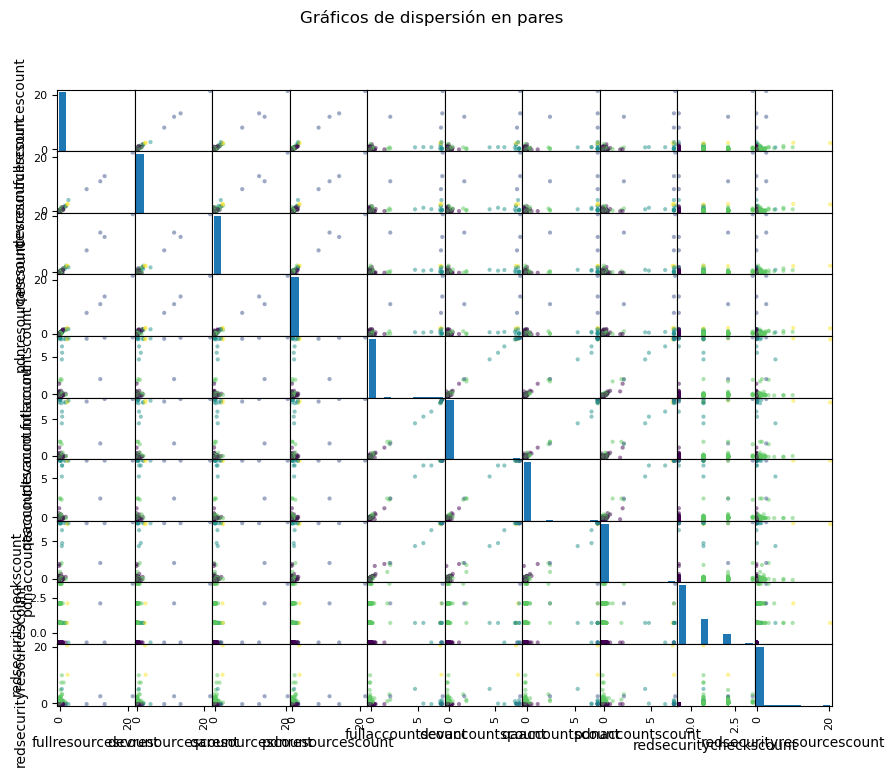

In [72]:
# Paso 6A - Gráfico de disperción en pares
# Utiliza todas las características, 5 en este ejemplo
scatter_matrix(df[features], alpha=0.5, figsize=(10,8), c=df['Cluster'], cmap='viridis', diagonal='hist')
plt.suptitle('Gráficos de dispersión en pares')
plt.show()

### Paso 7

In [17]:
# Paso 7 - Aignación de categorias (manualmente).
# En este ejemplo, asignaremos manualmente etiquetas a los clústeres.
categorias = {
                0: 'Categoría A',
                1: 'Categoría B',
                2: 'Categoría C',
                3: 'Categoría D',
                4: 'Categoría E',
            }
df['Categoria'] = df['Cluster'].map(categorias)

### Paso 8

In [35]:
# Paso 8 - Validación (no se realiza en este ejemplo de datos de muestra)

In [18]:
# Mostrar el dataframe con las categorías asignadas:
print(df[['applicationcode', 'Categoria']])

    applicationcode    Categoria
0          app00609  Categoría A
1          app00613  Categoría C
2          app00610  Categoría A
3          app00614  Categoría A
4          app00612  Categoría A
..              ...          ...
907        app00655  Categoría C
908        app00661  Categoría A
909        app00658  Categoría A
910        app00656  Categoría C
911        app00660  Categoría A

[912 rows x 2 columns]


### Paso 8.1

La correlación entre cada característica y la variable objetivo (en este caso, el clúster asignado). Las características con una alta correlación positiva o negativa son potencialmente más importantes.

In [19]:
# Paso 9 - Análisis de correlación de características.
correlaciones = df[features + ['Cluster']].corr()

In [20]:
print(correlaciones)

                                    RedSecurityChecksCount  \
RedSecurityChecksCount                            1.000000   
RedSecurityResourcesCount                         0.541841   
YellowSecurityChecksCount                         0.693642   
YellowSecurityResourcesCount                      0.444852   
RedFaultToleranceChecksCount                      0.102025   
RedFaultToleranceResourcesCount                   0.126244   
YellowFaultToleranceChecksCount                   0.357304   
YellowFaultToleranceResourcesCount                0.224355   
RedPerformanceChecksCount                         0.072625   
RedPerformanceResourcesCount                      0.072625   
YellowPerformanceChecksCount                      0.442808   
YellowPerformanceResourcesCount                   0.119586   
RedCostOptimizingChecksCount                     -0.004691   
RedCostOptimizingResourcesCount                  -0.004691   
YellowCostOptimizingChecksCount                   0.003136   
YellowCo

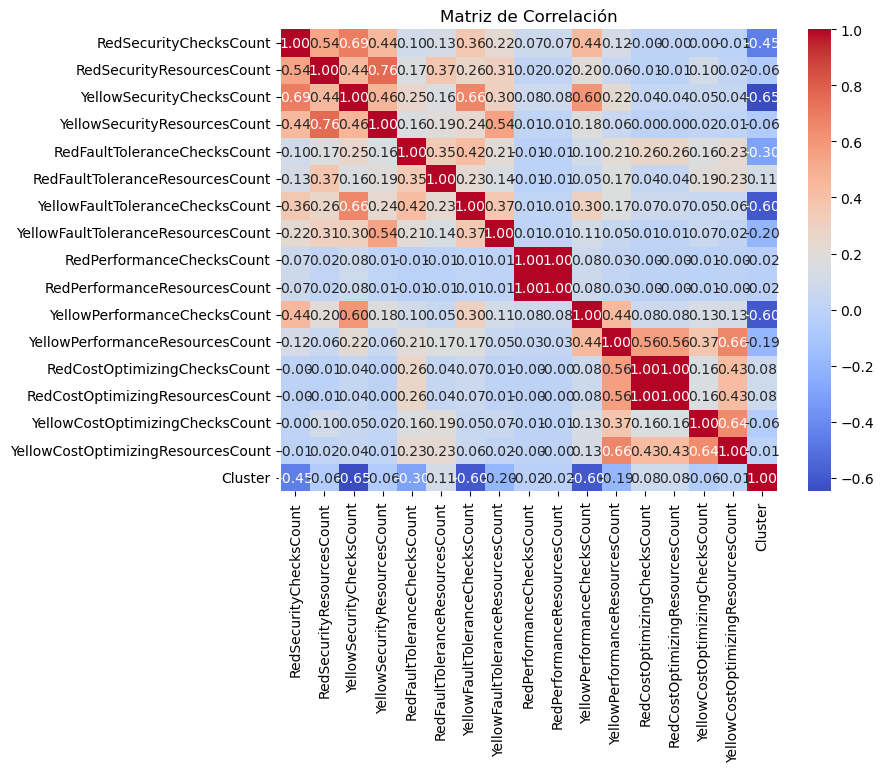

In [61]:
# Crear una visualización de la matriz de correlación utilizando Seaborn
correlation_matrix = correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

En el ejemplo, la característica redsecuritycheckscount, es la única que presenta alguna correlación con el clúster, 0.888, las otras no aportan a la clasificación.

### Paso 8.2

Análisis de varianza.
Realiza un análisis de varianza (ANOVA) para cada característica en relación con la variable objetivo. Esto puede ayudar a identificar si una característica tiene diferencias significativas entre los clústeres.

In [31]:
# Paso 10 - Análisis de varianza
for feature in features:
    grupos = []
    for cluster in range(K):
        grupos.append(df[df['Cluster'] == cluster][feature])
        if len(grupos) > 1:
            f_statistic, p_value = f_oneway(*grupos)
            print(f"Estadística F: {f_statistic}")
            print(f"Valor p: {p_value}")
            print("\n")
        else:
            print(f"No se puede realizar el análisis de varianza para {feature} debido a la falta de datos en algunos clústeres.")
            print("\n")

No se puede realizar el análisis de varianza para RedSecurityChecksCount debido a la falta de datos en algunos clústeres.


Estadística F: 1.114709756828201
Valor p: 0.29192725309661643


Estadística F: 211.2060685013266
Valor p: 5.830514481351831e-76


Estadística F: 140.80781851302362
Valor p: 7.634089319169144e-75


Estadística F: 118.01755391062738
Valor p: 4.637329813013753e-81


No se puede realizar el análisis de varianza para RedSecurityResourcesCount debido a la falta de datos en algunos clústeres.


Estadística F: 0.08475403254210857
Valor p: 0.7711606477358113


Estadística F: 46.63526497269406
Valor p: 5.3295696853037623e-20


Estadística F: 31.148282358753534
Valor p: 3.648636526101131e-19


Estadística F: 131.8433506014784
Valor p: 8.978762700722735e-89


No se puede realizar el análisis de varianza para YellowSecurityChecksCount debido a la falta de datos en algunos clústeres.


Estadística F: 1.616843633799045
Valor p: 0.20453744174338676


Estadística F: 640.0509607310

### Paso 8.3

Selección recursiva de características (Recursive Feature Elimination -RFE).
Es una técnica que implica la eliminacióniterativa de características menos importantes de un conjunto de datos hasta que se obtiene el subconjunto óptimo de características. Esta técnica se puede utilizar en combinación con mdelos de aprendizaje automático, como el algoritmo Random -Forest, para clasificar las características por importancia.

In [37]:
# Selcción de características con RFE
X = df[features]
Y = df['Cluster'] # usaremos el clúster como variable objetivo

In [38]:
# Usamos el algorítmo Random Forest para evaluar la importancia de las características
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [39]:
# Usamos RFE para seleccionar las características más importantes
rfe = RFE(estimator=clf, n_features_to_select=2) # Cambia el número según tus necesidades
rfe.fit(X,Y)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=2)

In [40]:
# Mostramos las características seleccionadas
print("Características seleccionadas:")
for i in range(len(features)):
    if rfe.support_[i]:
        print(features[i])

Características seleccionadas:
YellowSecurityResourcesCount
YellowFaultToleranceResourcesCount


### Paso 8.4

Modelos de Aprendizaje Automático:
Entrena un modelo de aprendizaje automático, como un clasificador Random Forest, y utiliza su atributo de importancia de características para evaluar cuáles características contribuyen más a la clasificación.

In [41]:
# Usamos el algorítmo Random Forest para evaluar la importancia de las características
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [43]:
# Selcción de características con RFE
X = df[features]
Y = df['Cluster'] # usaremos el clúster como variable objetivo
clf.fit(X, Y)

RandomForestClassifier(random_state=42)

In [44]:
# Obtención de la importancia de características
importancias = clf.feature_importances_

In [46]:
# Mostrar la importancia de cada característica
for feature_name, importancia in zip(features, importancias):
    print(f"{feature_name}: {importancia:.4f}")

RedSecurityChecksCount: 0.0487
RedSecurityResourcesCount: 0.0467
YellowSecurityChecksCount: 0.1638
YellowSecurityResourcesCount: 0.1844
RedFaultToleranceChecksCount: 0.0477
RedFaultToleranceResourcesCount: 0.0477
YellowFaultToleranceChecksCount: 0.1059
YellowFaultToleranceResourcesCount: 0.1730
RedPerformanceChecksCount: 0.0033
RedPerformanceResourcesCount: 0.0051
YellowPerformanceChecksCount: 0.0722
YellowPerformanceResourcesCount: 0.0895
RedCostOptimizingChecksCount: 0.0026
RedCostOptimizingResourcesCount: 0.0026
YellowCostOptimizingChecksCount: 0.0013
YellowCostOptimizingResourcesCount: 0.0055


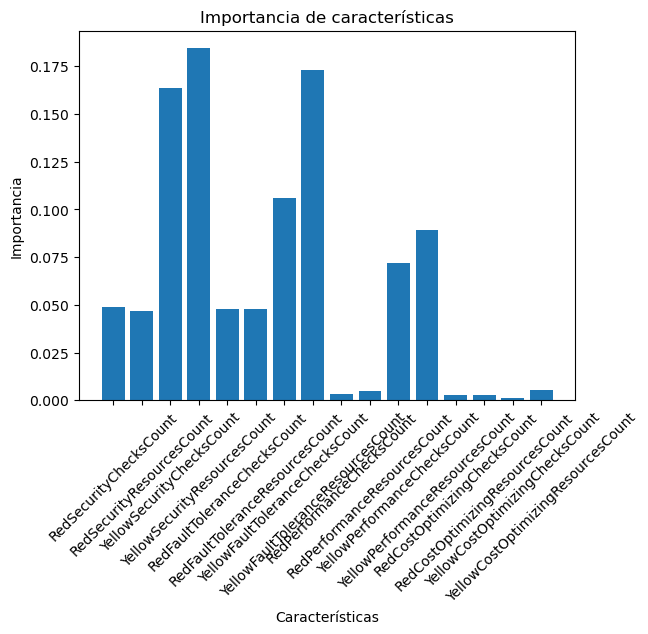

In [47]:
# Gráfico de barras para mostrar la importancia de cada característica
plt.bar(range(len(features)), importancias, tick_label=features)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de características')
plt.xticks(rotation=45)
plt.show()